In [1]:
import os, sys
import glob, h5py 
import numpy as np 

In [2]:
import matplotlib.pyplot as plt 
% run /Users/hm/.matplotlib.py

In [3]:
omm_list = sorted(glob.glob('../MD_exps/fs-pep/omm_runs_*'))[:120*5]

In [4]:
cm_data_lists = [] 
num_frame = 0 
for omm in omm_list: 
    cm_file = os.path.join(omm, 'output_cm.h5')
    cm_h5 = h5py.File(cm_file, 'r', libver='latest', swmr=True) 
#     print cm_h5[u'contact_maps']
    cm_data_lists.append(cm_h5[u'contact_maps'].value) 
    num_frame += cm_h5[u'contact_maps'].shape[1]
#     print cm_h5[u'contact_maps'].shape[1]
    cm_h5.close() 

In [5]:
num_frame

336000

In [6]:
len(omm_list)

600

In [7]:
pca_input = np.hstack(cm_data_lists).T

In [8]:
pca_input.shape

(336000, 210)

```python
>>> import numpy as np
>>> from sklearn.decomposition import PCA
>>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
>>> pca = PCA(n_components=2)
>>> pca.fit(X)  
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
>>> print(pca.explained_variance_ratio_)  
[0.9924... 0.0075...]
>>> print(pca.singular_values_)  
[6.30061... 0.54980...]
```

In [9]:
h5_load = h5py.File('./latent3d_fsp.h5', 'r')

In [12]:
RMSD = h5_load['RMSD'].value

In [13]:
h5_load.close()

In [14]:
from sklearn.decomposition import PCA 

In [15]:
pca = PCA(n_components=2) 
# pca.fit(pca_input) 
pca_embed = pca.fit_transform(pca_input)

In [16]:
pca_embed.shape

(336000, 2)

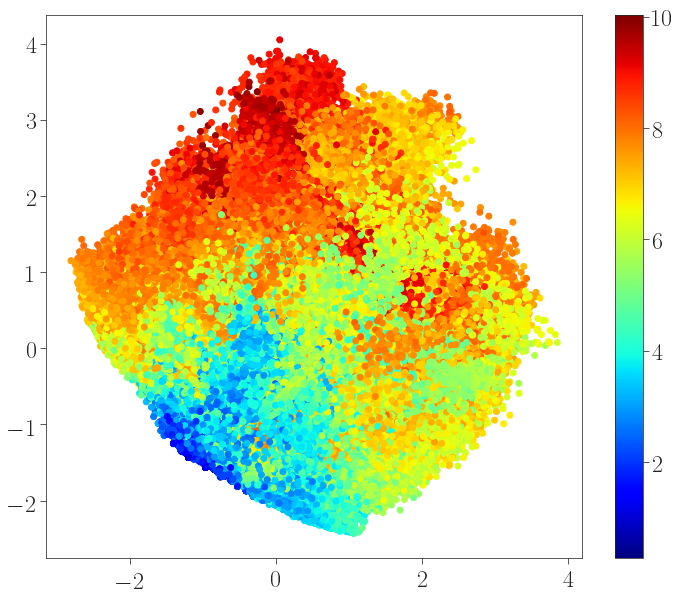

In [23]:
fig, ax = plt.subplots(figsize=(12,10)) 
sc = plt.scatter(pca_embed[:,0], pca_embed[:,1], c=RMSD, cmap='jet') 
plt.colorbar(sc) 

In [28]:
pca3 = PCA(n_components=3) 
# pca.fit(pca_input) 
pca3_embed = pca3.fit_transform(pca_input) 

In [29]:
pca_h5 = h5py.File('./pca_fsp.h5', 'w') 

In [30]:
pca_h5.create_dataset('pca3', data=pca3_embed) 
pca_h5.create_dataset('pca2', data=pca_embed) 
pca_h5.close() 

In [31]:
pca3_embed.shape

(336000, 3)